### Connect the drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [ ]:
df= pd.read_csv("/content/gdrive/MyDrive/FoodBalanceSheets_E_Africa_NOFLAG.csv",encoding='latin-1')

In [ ]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


### Data Visualization

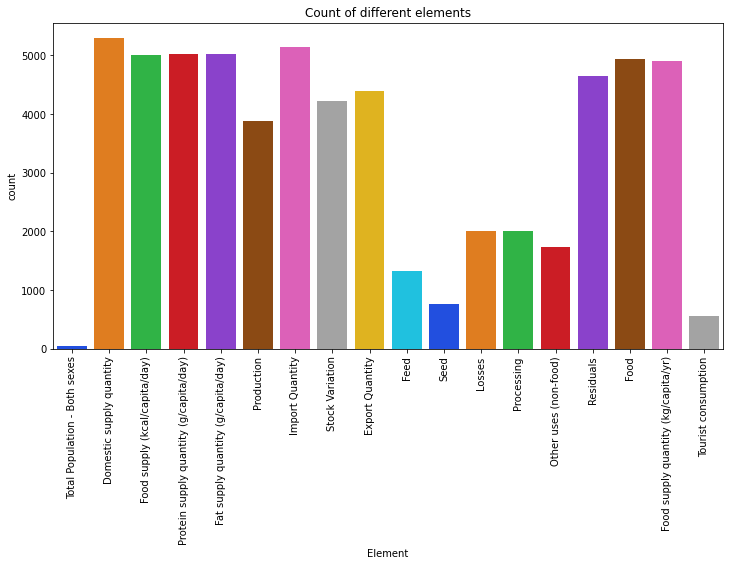

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Element'],palette='bright')
plt.xticks(rotation=90);
plt.title("Count of different elements")
plt.show()

In [ ]:
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


## Quiz Questions


### Question: 12
What is the mean and standard deviation across the whole dataset for the year 2015 to 3 decimal places?

In [ ]:
round(df['Y2015'].mean(),3)

135.236

In [ ]:
round(df['Y2015'].std(),3)

1603.404

###Question: 11
What is the total sum of Animal Fat produced in 2014 and 2017 respectively?<br><br>
- **Y2014:** 209460.54<br><br>
- **Y2017:**  269617.53


In [ ]:
df.groupby('Item')['Y2014'].sum()

Item
Alcohol, Non-Food        2403.00
Alcoholic Beverages    102410.11
Animal Products         11935.65
Animal fats            209460.54
Apples and products      9499.23
                         ...    
Vegetables, Other      155038.96
Vegetal Products       107145.19
Wheat and products     232670.13
Wine                     4497.36
Yams                   200396.96
Name: Y2014, Length: 119, dtype: float64

In [ ]:
df.groupby('Item')['Y2017'].sum()

Item
Alcohol, Non-Food        2348.00
Alcoholic Beverages     95581.06
Animal Products         11547.65
Animal fats            269617.53
Apples and products     10198.90
                         ...    
Vegetables, Other      157752.59
Vegetal Products       107655.20
Wheat and products     240047.62
Wine                     4178.02
Yams                   229174.59
Name: Y2017, Length: 119, dtype: float64

###Question: 13
What is the total number and percentage of missing data in 2016 to 2 decimal places?

In [ ]:
m_v = df['Y2016'].isnull().sum()
m_v

1535

In [ ]:
percentage = round((m_v / len(df['Y2016']))*100,2)
percentage

2.52

### Question 14:
Which year had the highest correlation with ‘Element Code’? 
- Y2014, Y2015, Y2017, Y2018

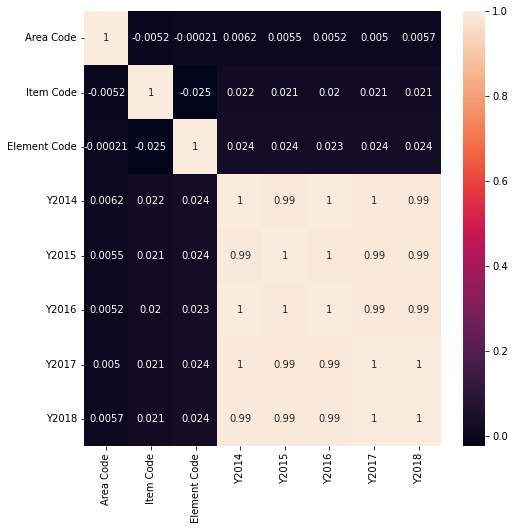

In [ ]:
plt.figure(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot=True)

###Question 15:
What year has the highest sum of Import Quantity?<br>
- Y2017

###Question 16:
What is the total number of the sum of Production in 2014?
- 1931287.75

In [ ]:
df.groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


###Question 17:
Which of these elements had the highest sum in 2018?
- Domestic supply quantity

### Question 18:
Which of these elements had the 3rd lowest sum in 2018?
- Protein supply quantity (g/capita/day)	

In [ ]:
df.groupby('Element').sum().sort_values(by='Y2018', ascending=True)

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Tourist consumption,50308,1486528,2869905,416.00,349.00,89.00,91.00,90.00
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Protein supply quantity (g/capita/day),675050,13535000,3385502,11836.46,11833.95,11779.69,11842.45,11833.56
Stock Variation,571566,11329527,21464704,58749.83,34910.99,33140.12,54316.91,20577.91
Seed,103537,2035933,4211574,21922.92,23976.82,23389.20,24870.14,25263.14
Residuals,623271,12421089,24066350,30149.00,30045.00,37224.00,35500.00,34864.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Other uses (non-food),235554,4729749,8926728,78718.13,66254.41,69563.68,91645.97,91300.97
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


###Question 19:
What is the total Import Quantity in Algeria in 2018?
-  36238.29

In [ ]:
df[df['Area']=='Algeria'].groupby('Element')['Y2018'].sum()

Element
Domestic supply quantity                  90023.42
Export Quantity                             811.54
Fat supply quantity (g/capita/day)          309.09
Feed                                      10668.00
Food                                      63736.33
Food supply (kcal/capita/day)             13288.00
Food supply quantity (kg/capita/yr)        1509.28
Import Quantity                           36238.29
Losses                                     7708.00
Other uses (non-food)                      3970.08
Processing                                 2479.00
Production                                60766.67
Protein supply quantity (g/capita/day)      367.28
Residuals                                   630.00
Seed                                        825.00
Stock Variation                            6172.00
Total Population - Both sexes             42228.00
Name: Y2018, dtype: float64

###Question 20:

What is the total number of unique countries in the dataset?

In [ ]:
len(df['Area'].unique())

49